# Introduction to Matplotlib

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

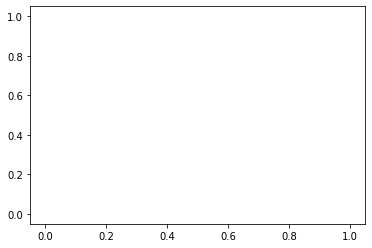

In [32]:
plt.plot();

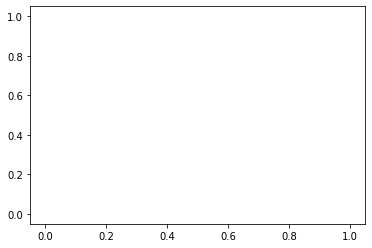

In [33]:
plt.plot()
plt.show()

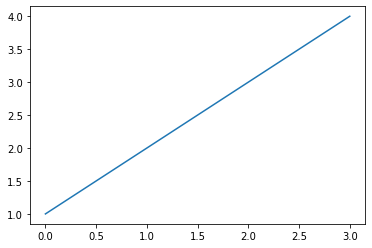

In [34]:
plt.plot([1,2,3,4]);

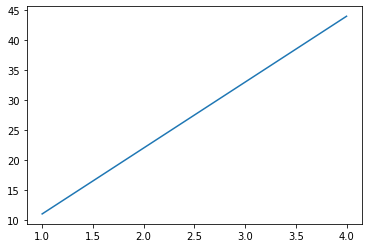

In [35]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x,y);

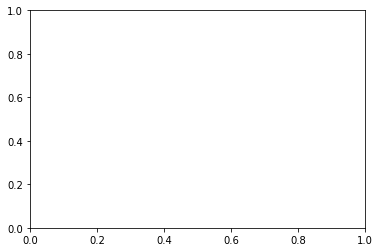

In [36]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

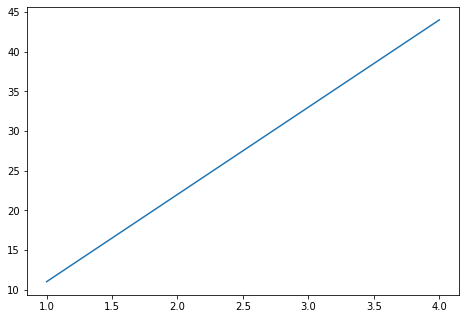

In [37]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

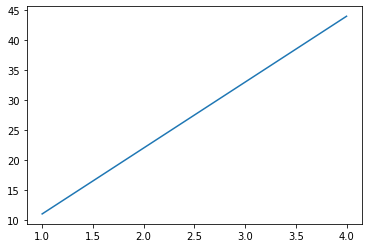

In [38]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add some data
type(fig), type(ax)

## Matplotlib example workflow

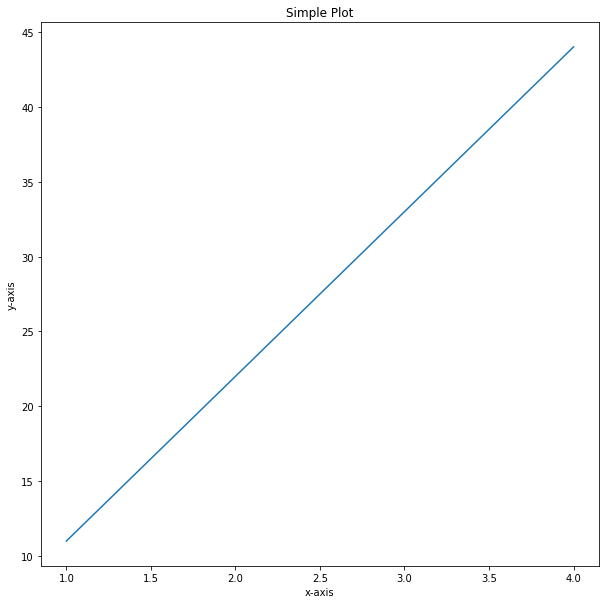

In [39]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save and show
fig.savefig("images/sample-plot.png")

## Making figures with NumPy Arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
*Subplot

In [40]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

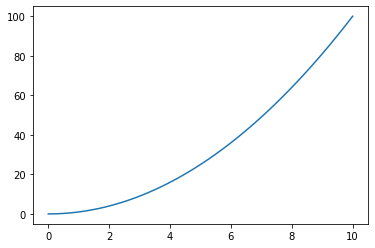

In [41]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

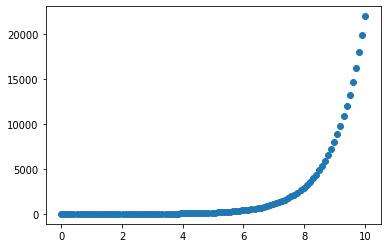

In [42]:
# Use the same data to make a Scatter plot 
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

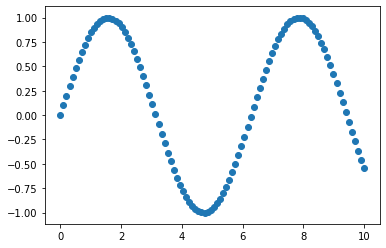

In [43]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

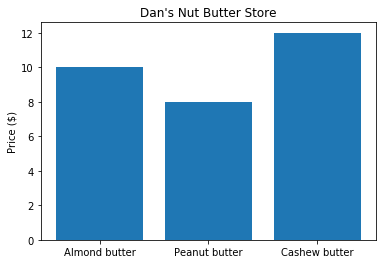

In [44]:
# Make a bar  plot from a dictionary
nut_butter_prices = {
    "Almond butter": 10,
    "Peanut butter": 8,
    "Cashew butter": 12
}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

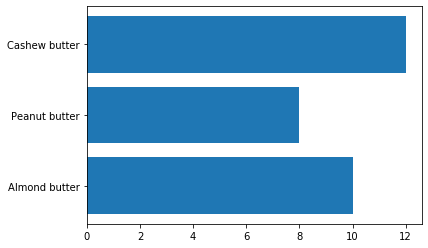

In [45]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

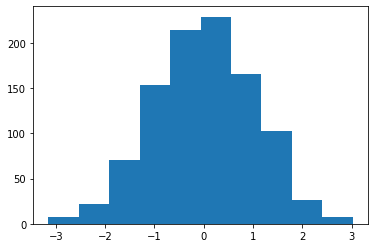

In [46]:
# Make some (random distribution) data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

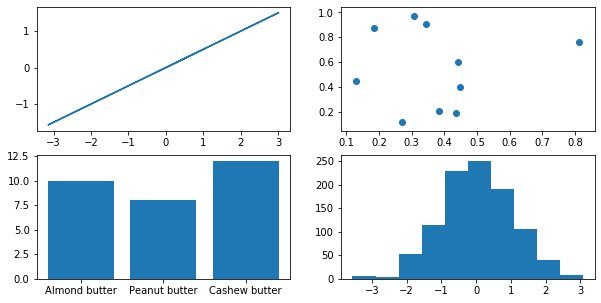

In [47]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2, 
                                             figsize=(10, 5))
# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

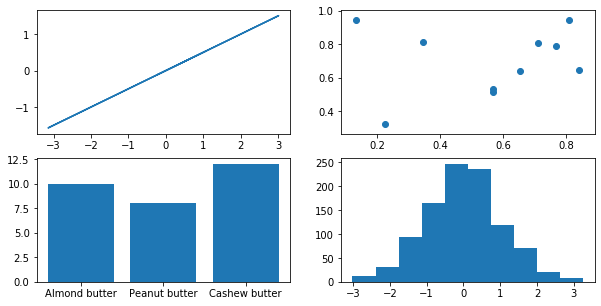

In [48]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))

# Plot to each different index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas dataframes

In [49]:
import pandas as pd

In [50]:
# Make a dataframe
car_sales = pd.read_csv("car_sales_dataframe.csv")
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,"$4,000.00"
1,1,Honda,Red,87899,4,"$5,000.00"
2,2,Toyota,Blue,32549,3,"$7,000.00"
3,3,BMW,Black,11179,5,"$22,000.00"
4,4,Nissan,White,213095,4,"$3,500.00"
5,5,Toyota,Green,99213,4,"$4,500.00"
6,6,Honda,Blue,45698,4,"$7,500.00"
7,7,Honda,Blue,54738,4,"$7,000.00"
8,8,Toyota,White,60000,4,"$6,250.00"
9,9,Nissan,White,31600,4,"$9,700.00"


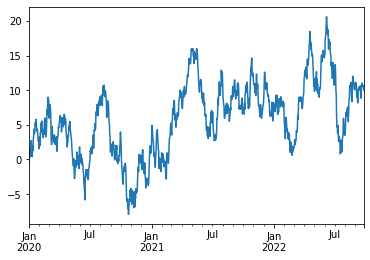

In [51]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot()

In [52]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$,\.]','')
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,400000
1,1,Honda,Red,87899,4,500000
2,2,Toyota,Blue,32549,3,700000
3,3,BMW,Black,11179,5,2200000
4,4,Nissan,White,213095,4,350000
5,5,Toyota,Green,99213,4,450000
6,6,Honda,Blue,45698,4,750000
7,7,Honda,Blue,54738,4,700000
8,8,Toyota,White,60000,4,625000
9,9,Nissan,White,31600,4,970000


In [53]:
type(car_sales["Price"][0])
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,4000
1,1,Honda,Red,87899,4,5000
2,2,Toyota,Blue,32549,3,7000
3,3,BMW,Black,11179,5,22000
4,4,Nissan,White,213095,4,3500
5,5,Toyota,Green,99213,4,4500
6,6,Honda,Blue,45698,4,7500
7,7,Honda,Blue,54738,4,7000
8,8,Toyota,White,60000,4,6250
9,9,Nissan,White,31600,4,9700


In [55]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods = len(car_sales))
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,0,Toyota,White,150043,4,4000,2020-01-01
1,1,Honda,Red,87899,4,5000,2020-01-02
2,2,Toyota,Blue,32549,3,7000,2020-01-03
3,3,BMW,Black,11179,5,22000,2020-01-04
4,4,Nissan,White,213095,4,3500,2020-01-05
5,5,Toyota,Green,99213,4,4500,2020-01-06
6,6,Honda,Blue,45698,4,7500,2020-01-07
7,7,Honda,Blue,54738,4,7000,2020-01-08
8,8,Toyota,White,60000,4,6250,2020-01-09
9,9,Nissan,White,31600,4,9700,2020-01-10


In [57]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,0,Toyota,White,150043,4,4000,2020-01-01,4000
1,1,Honda,Red,87899,4,5000,2020-01-02,9000
2,2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,3,BMW,Black,11179,5,22000,2020-01-04,38000
4,4,Nissan,White,213095,4,3500,2020-01-05,41500
5,5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,8,Toyota,White,60000,4,6250,2020-01-09,66750
9,9,Nissan,White,31600,4,9700,2020-01-10,76450


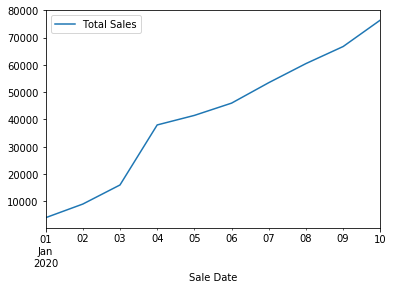

In [58]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

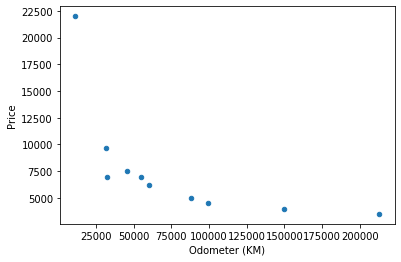

In [66]:
# Reassing price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [70]:
# BAR GRAPH
x = np.random.rand(10, 4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.033227,0.652909,0.117177,0.109748
1,0.301688,0.147729,0.580740,0.155052
2,0.763369,0.273569,0.921217,0.073069
3,0.218099,0.735263,0.821971,0.106679
4,0.783468,0.149110,0.076645,0.071891
5,0.945882,0.500198,0.225443,0.047891
6,0.564645,0.071421,0.516394,0.941143
7,0.025168,0.136410,0.491591,0.545685
8,0.876411,0.663132,0.482910,0.546296
9,0.208205,0.251089,0.952496,0.799459


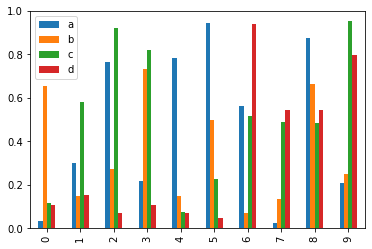

In [71]:
df.plot.bar();

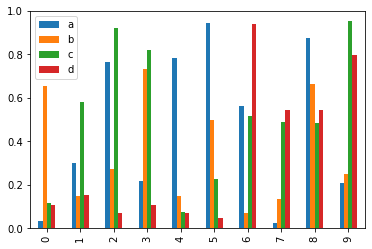

In [72]:
df.plot(kind="bar");

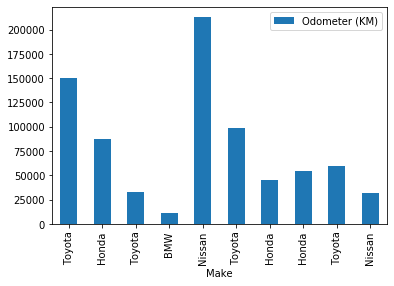

In [74]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

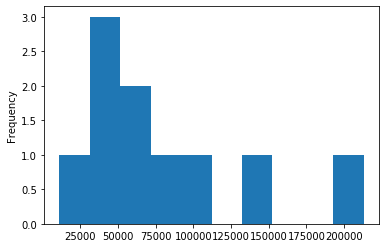

In [76]:
# HISTOGRAMS

car_sales["Odometer (KM)"].plot.hist();

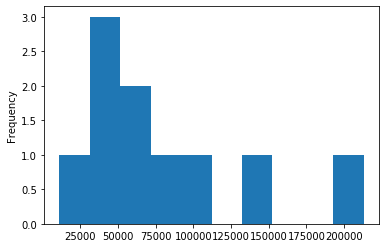

In [77]:
car_sales["Odometer (KM)"].plot(kind="hist");

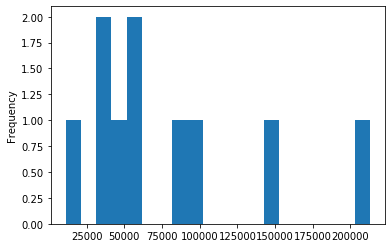

In [82]:
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [88]:
# Another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


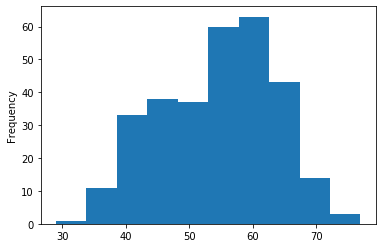

In [90]:
# Create a histogram of age
heart_disease["age"].plot.hist(bins=10);

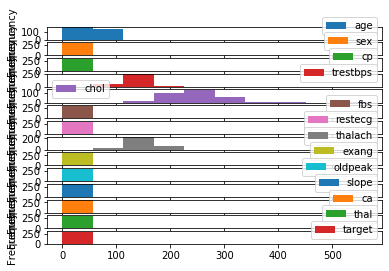

In [91]:
# Subplots
heart_disease.plot.hist(figsizsubplots=True);